# Advanced Customer Segmentation

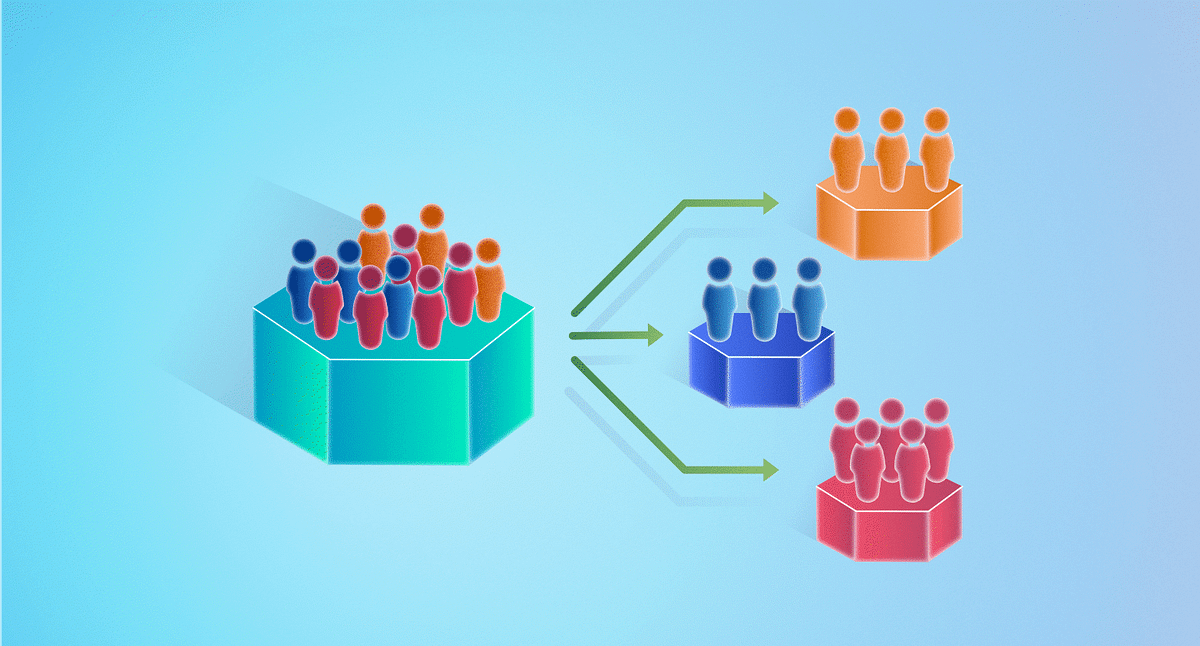

### Gerekli kütüphaneleri yükleme

In [1]:
import numpy as np 
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
from pyclustering.cluster.kmedoids import kmedoids
from pyclustering.cluster import cluster_visualizer
from itertools import cycle


### Veri setini yükleme

In [2]:
df = pd.read_csv("AdvancedSegmentation_data.csv")

### Veri setini gösterme

In [3]:
df.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


### Veri setini ön işleme

In [4]:
threshold_income = 0.95
threshold_age = 0.95
df = df[(df['Income'] < df['Income'].quantile(threshold_income)) & (df['Age'] < df['Age'].quantile(threshold_age))]


### Sayısal özellikleri normalize etme

In [5]:
scaler = MinMaxScaler()
df[['Age', 'Income']] = scaler.fit_transform(df[['Age', 'Income']])

### Veri setinden gereksiz sütun kaldırma

In [6]:
df = df.drop(['ID'], axis=1)

### Kullanılacak sütunları seçme

In [7]:
mark_array = df[['Age', 'Income']].values

### KMedoids uygulama

In [8]:
initial_medoids = np.random.randint(0, len(mark_array), size=10)
kmedoids_instance = kmedoids(mark_array, initial_medoids, data_type='points')
kmedoids_instance.process()

### Elde edilen küme bilgilerini alma

In [9]:
clusters = kmedoids_instance.get_clusters()

### Küme adlarını belirleme

In [10]:
cluster_names = {
    0: 'Düşük Gelir - Genç',
    1: 'Orta Gelir - Orta Yaş',
    2: 'Yüksek Gelir - Genç',
    3: 'Düşük Gelir - Orta Yaş',
    4: 'Yüksek Gelir - Orta Yaş',
    5: 'Düşük Gelir - Yaşlı',
    6: 'Orta Gelir - Yaşlı',
    7: 'Yüksek Gelir - Yaşlı',
    8: 'Düşük Gelir - Çocuk',
    9: 'Yüksek Gelir - Çocuk',
}

### Kullanılacak renkleri belirleme

In [11]:
colors = cycle(['navy', 'blue', 'deepskyblue', 'royalblue', 'dodgerblue', 'skyblue', 'lightsteelblue', 'steelblue', 'mediumslateblue', 'slateblue'])

### KMedoids modelinin sonuçlarını görselleştirme

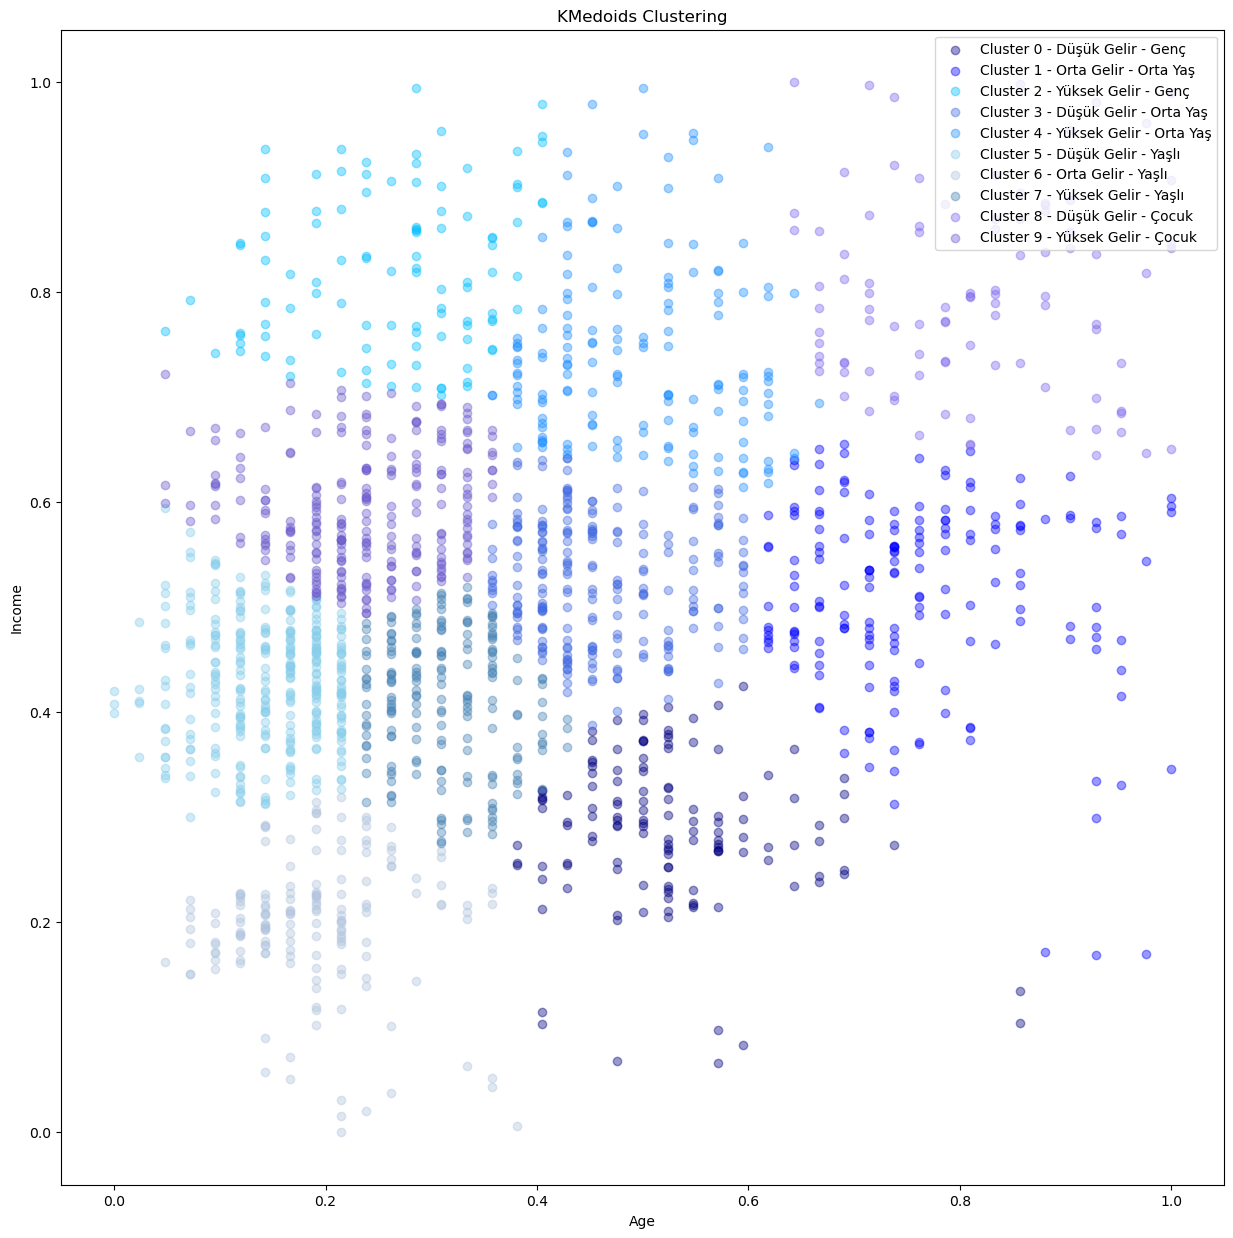

In [12]:
plt.figure(figsize=(15, 15))
plt.xlabel('Age')
plt.ylabel('Income')

for cluster_id, color in zip(range(len(clusters)), colors):
    cluster_df = mark_array[clusters[cluster_id]]
    plt.scatter(cluster_df[:, 0], cluster_df[:, 1], color=color, alpha=0.4, label=f'Cluster {cluster_id} - {cluster_names[cluster_id]}')

plt.legend(loc='upper right') 
plt.title('KMedoids Clustering')
plt.show()